# Week 4 - Practice


## Exploratory Data Analysis

* Getting to know your data: center, spread, shape
* Data types: numerical, categorical, nominal, ordinal, boolean
* Cardinality, duplications, and missing data
* Outliers
* Engineer features with too many labels
* Understanding relationships between variables: feature with feature, feature with target
* Feature engineering
* Feature selection

In Week 3 - Practice we explored center, spread, and shape. Looked at data types, cardinality, duplications, and missing values.

This week we'll explore: 
* Outliers
* Engineer features with too many labels
* Understanding relationships between variables: feature with feature, feature with target
* Feature engineering
* Feature selection

In [1]:
# get data and merge with demographics
import pandas as pd

grades = pd.read_csv('class-grades4.csv', index_col=0)
grades.sort_values(by=['Prefix'], inplace=True)
grades = grades.reset_index()
print(grades.shape)
demographics = pd.read_csv('class_demographics.csv')
grades = grades.join(demographics)
grades.drop(['Unnamed: 0'], axis=1, inplace=True)
print(grades.shape)
print(grades.info())

(99, 10)
(99, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        99 non-null     int64  
 1   Prefix       99 non-null     int64  
 2   Assignment1  99 non-null     float64
 3   Tutorial     99 non-null     float64
 4   Midterm      99 non-null     float64
 5   Final        99 non-null     float64
 6   TakeHome     99 non-null     object 
 7   FinalGrade   99 non-null     float64
 8   work_status  99 non-null     object 
 9   scholarship  99 non-null     int64  
 10  name         99 non-null     object 
 11  age          99 non-null     float64
 12  sex          99 non-null     object 
 13  home.dest    67 non-null     object 
dtypes: float64(6), int64(3), object(5)
memory usage: 11.0+ KB
None


In [2]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        79 non-null     int64  
 1   Prefix       79 non-null     int64  
 2   Assignment1  79 non-null     float64
 3   Tutorial     79 non-null     float64
 4   Midterm      79 non-null     float64
 5   Final        79 non-null     float64
 6   TakeHome     79 non-null     object 
 7   work_status  79 non-null     object 
 8   scholarship  79 non-null     int64  
 9   name         79 non-null     object 
 10  age          79 non-null     float64
 11  sex          79 non-null     object 
 12  home.dest    54 non-null     object 
dtypes: float64(5), int64(3), object(5)
memory usage: 8.6+ KB


### Outliers

In [3]:
# outliers
import numpy as np
from scipy import stats

X_train.describe()

,index,Prefix,Assignment1,Tutorial,Midterm,Final,scholarship,age
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,49.240506,7.367089,85.755570,90.503291,68.875443,68.797255,0.632911,16.278481
std,29.296983,0.879645,12.268775,14.440990,10.044896,18.606290,0.485091,2.104249
min,0.000000,4.000000,28.140000,34.090000,46.000000,28.060000,0.000000,10.000000
25%,24.000000,7.000000,81.220000,86.760000,62.000000,54.165000,0.000000,16.000000
50%,50.000000,8.000000,90.100000,92.865000,69.880000,68.330000,1.000000,17.000000
75%,74.000000,8.000000,93.830000,98.970000,76.000000,84.445000,1.000000,18.000000
max,98.000000,8.000000,100.830000,112.580000,94.000000,108.890000,1.000000,18.500000


In [4]:
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = grades[feat].quantile(0.25)
    q3 = grades[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = grades[feat][grades[feat] < lower_fence].count()
    upper_count = grades[feat][grades[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

Prefix outliers = 5: lower_fence: 6.0, upper_fence: 10.0, lower_count: 5, upper_count: 0
Assignment1 outliers = 5: lower_fence: 61.0, upper_fence: 116.0, lower_count: 5, upper_count: 0
Tutorial outliers = 11: lower_fence: 68.0, upper_fence: 117.0, lower_count: 11, upper_count: 0
Midterm outliers = 0: lower_fence: 44.0, upper_fence: 96.0, lower_count: 0, upper_count: 0
Final outliers = 0: lower_fence: 10.0, upper_fence: 128.0, lower_count: 0, upper_count: 0
scholarship outliers = 0: lower_fence: -2.0, upper_fence: 2.0, lower_count: 0, upper_count: 0
age outliers = 6: lower_fence: 12.0, upper_fence: 22.0, lower_count: 6, upper_count: 0


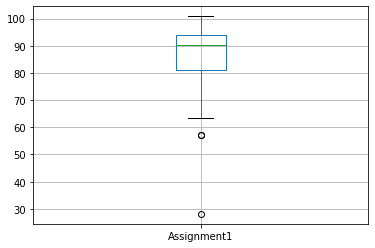

In [5]:
# boxplot of Tutorial
X_train.boxplot('Assignment1');

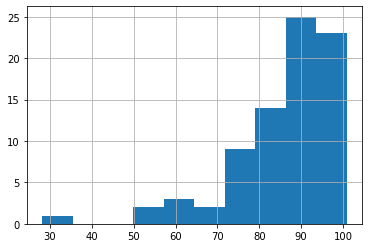

In [6]:
X_train['Assignment1'].hist();

In [7]:
X_train['Assignment1'].describe()

count     79.000000
mean      85.755570
std       12.268775
min       28.140000
25%       81.220000
50%       90.100000
75%       93.830000
max      100.830000
Name: Assignment1, dtype: float64

### Engineer Features With Too Many Labels

In [8]:
X_train['home.dest'].value_counts(dropna=False).sum()

79

In [9]:
X_test[X_test['home.dest'].isnull()]

,index,Prefix,Assignment1,Tutorial,Midterm,Final,TakeHome,work_status,scholarship,name,age,sex,home.dest
40,9,7,90.10,97.55,72.0,63.61,D,half_time,1,"Maioni, Miss. Roberta",16.0,female,NaN
97,65,8,97.00,103.02,66.0,94.44,A,not_employed,0,"Swane, Mr. George",18.5,male,NaN
0,83,4,86.86,62.64,61.0,62.78,B,not_employed,0,"Rice, Master. Albert",10.0,male,NaN
31,29,7,91.62,65.18,69.0,45.56,A,half_time,1,"Panula, Mr. Ernesti Arvid",16.0,male,NaN
47,67,8,92.02,100.58,69.0,63.89,D,not_employed,1,"Dika, Mr. Mirko",17.0,male,NaN
44,81,7,74.29,65.70,70.0,55.00,A,full_time,0,"Kallio, Mr. Nikolai Erland",17.0,male,NaN
22,43,7,86.26,74.66,77.0,82.22,D,full_time,1,"McGowan, Miss. Anna ""Annie""",15.0,female,NaN


In [10]:
import pandas as pd

titanic = pd.read_csv('titanic_watson.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [11]:
titanic[titanic['name'].str.contains('Rice', na=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1141,3.0,0.0,"Rice, Master. Albert",male,10.0,4.0,1.0,382652,29.125,NaN,Q,NaN,NaN,NaN
1142,3.0,0.0,"Rice, Master. Arthur",male,4.0,4.0,1.0,382652,29.125,NaN,Q,NaN,NaN,NaN
1143,3.0,0.0,"Rice, Master. Eric",male,7.0,4.0,1.0,382652,29.125,NaN,Q,NaN,NaN,NaN
1144,3.0,0.0,"Rice, Master. Eugene",male,2.0,4.0,1.0,382652,29.125,NaN,Q,NaN,NaN,NaN
1145,3.0,0.0,"Rice, Master. George Hugh",male,8.0,4.0,1.0,382652,29.125,NaN,Q,NaN,NaN,NaN
1146,3.0,0.0,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5.0,382652,29.125,NaN,Q,NaN,327.0,NaN


In [12]:
import re

def cat_home(r):
    text = str(r['home.dest']).strip()
    if bool(re.search('[A-Z]{2}$', text[-2:])):
        return 'North America'
    elif text == 'nan':
        return 'Missing'
    else:
        return 'Not North America'

X_train['cat_home'] = X_train.apply(cat_home, axis=1)
X_test['cat_home'] = X_test.apply(cat_home, axis=1)

print(X_train['cat_home'].value_counts())
print()
print(X_test['cat_home'].value_counts())

North America        42
Missing              25
Not North America    12
Name: cat_home, dtype: int64

North America        11
Missing               7
Not North America     2
Name: cat_home, dtype: int64


### Understanding Relationships Between Features

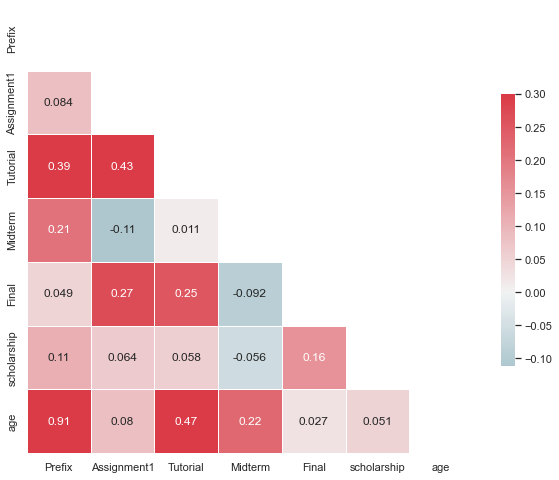

In [13]:
# the heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# compute the correlation matrix
corr = X_train.drop('index', axis=1).corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

### Understanding Relationships Between Features and Target

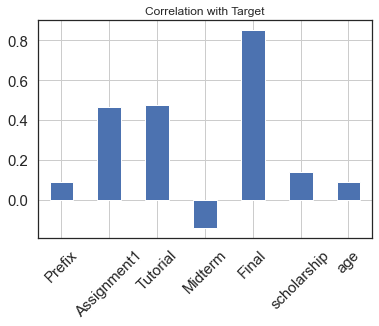

In [14]:
# correlation anlaysis against our titanic target (survived)
X_train.drop('index', axis=1)._get_numeric_data().corrwith(y_train).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

### Feature Engineering

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        79 non-null     int64  
 1   Prefix       79 non-null     int64  
 2   Assignment1  79 non-null     float64
 3   Tutorial     79 non-null     float64
 4   Midterm      79 non-null     float64
 5   Final        79 non-null     float64
 6   TakeHome     79 non-null     object 
 7   work_status  79 non-null     object 
 8   scholarship  79 non-null     int64  
 9   name         79 non-null     object 
 10  age          79 non-null     float64
 11  sex          79 non-null     object 
 12  home.dest    54 non-null     object 
 13  cat_home     79 non-null     object 
dtypes: float64(5), int64(3), object(6)
memory usage: 9.3+ KB


#### Bi-Label Mapping

In [16]:
X_train['sex'] = X_train['sex'].map({'female':1,'male':0})
X_test['sex'] = X_test['sex'].map({'female':1,'male':0})

#### One Hot Encoding

In [17]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')

cat_features = ['Prefix', 'TakeHome', 'work_status', 'cat_home']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(X_train.info())

(79, 22)
(20, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       79 non-null     int64  
 1   Assignment1                 79 non-null     float64
 2   Tutorial                    79 non-null     float64
 3   Midterm                     79 non-null     float64
 4   Final                       79 non-null     float64
 5   scholarship                 79 non-null     int64  
 6   name                        79 non-null     object 
 7   age                         79 non-null     float64
 8   sex                         79 non-null     int64  
 9   home.dest                   54 non-null     object 
 10  Prefix_5                    79 non-null     float64
 11  Prefix_6                    79 non-null     float64
 12  Prefix_7                    79 non-null     float64
 13  Prefix_8          

### Feature Selection

In [18]:
# drop index, name, home.dest
X_train.drop(['index', 'name', 'home.dest', 'age'], axis=1, inplace=True)
X_test.drop(['index', 'name', 'home.dest', 'age'], axis=1, inplace=True)

In [19]:
# build model
import pandas as pd
import statsmodels.api as sm

X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FinalGrade   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     18.36
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           5.36e-18
Time:                        19:44:38   Log-Likelihood:                -243.94
No. Observations:                  79   AIC:                             525.9
Df Residuals:                      60   BIC:                             570.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.7060     13.701      0.125      0.901     -25.700      29.112
Assignment1                    0.1632      0.077      2.121      0.038       0.009       0.317
Tutorial                       0.2867      0.079      3.647      0.001       0.129       0.444
Midterm                       -0.0551      0.076     -0.724      0.472      -0.207       0.097
Final                          0.5283      0.046     11.474      0.000       0.436       0.620
scholarship                    0.5837      1.627      0.359      0.721      -2.671       3.838
sex                           -1.7269      1.613     -1.071      0.289      -4.953       1.499
Prefix_5                      12.2393      9.769      1.253      0.215      -7.302      31.781
Prefix_6                       7.6008      6.101      1.246      0.218      -4.603      19.804
Prefix_7                       5.4532      5.122      1.065      0.291      -4.793      15.699
Prefix_8                       2.7121      4.946      0.548      0.585      -7.181      12.605
TakeHome_B                    -0.4062      2.193     -0.185      0.854      -4.792       3.980
TakeHome_C                    -0.4673      2.845     -0.164      0.870      -6.159       5.224
TakeHome_D                     0.0020      2.796      0.001      0.999      -5.590       5.594
TakeHome_F                    -0.6641      2.887     -0.230      0.819      -6.440       5.111
work_status_half_time         -0.7240      2.597     -0.279      0.781      -5.919       4.471
work_status_not_employed      -1.5858      2.423     -0.655      0.515      -6.432       3.260
cat_home_North America        -1.4296      1.782     -0.802      0.426      -4.994       2.135
cat_home_Not North America    -0.8341      2.325     -0.359      0.721      -5.485       3.817
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.720
Skew:                          -0.233   Prob(JB):                        0.698
Kurtosis:                       3.036   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# add constant and build model
import statsmodels.api as sm

model = sm.OLS(y_train, X_train[['const', 'Assignment1', 'Tutorial', 'Final']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FinalGrade   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     112.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.05e-27
Time:                        19:44:38   Log-Likelihood:                -250.54
No. Observations:                  79   AIC:                             509.1
Df Residuals:                      75   BIC:                             518.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4923      5.394      0.647      0.519      -7.253      14.238
Assignment1     0.1891      0.062      3.074      0.003       0.067       0.312
Tutorial        0.2001      0.052      3.846      0.000       0.096       0.304
Final           0.5497      0.038     14.507      0.000       0.474       0.625
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.746
Skew:                          -0.187   Prob(JB):                        0.689
Kurtosis:                       2.705   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model and Evaluation

In [21]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train.drop('const', axis=1), y_train)

# test set prediction results
predictions = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=predictions)}')
print(f'R-Squared: {r2_score(y_test, predictions)}')

MSE: 31.260511318655922
R-Squared: 0.7781801896815319


## Some More Data Analysis Techniques

https://towardsdatascience.com/3-functions-to-use-with-pandas-groupby-that-you-probably-dont-use-724db94327ee

### Merging  / Joining DataFrames



In [22]:
# https://github.com/rajeevratan84/datascienceforbusiness
import pandas as pd

hr_df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv')
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [23]:

emp_satis_eval = pd.read_excel('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx')
print(emp_satis_eval.head())

   EMPLOYEE #  satisfaction_level  last_evaluation
0        1003                0.38             0.53
1        1005                0.80             0.86
2        1486                0.11             0.88
3        1038                0.72             0.87
4        1057                0.37             0.52


In [24]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [25]:
main_df.groupby('department').sum()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,56344929,4683,248119,4256,164,273,3,757.56,878.02
RandD,32948168,3033,158030,2650,134,121,27,487.80,559.73
accounting,34474313,2934,154292,2702,96,204,14,446.07,549.99
hr,31664725,2701,146828,2480,89,215,15,441.31,523.29
management,33597098,2432,126787,2711,103,91,69,390.54,453.37
marketing,40715777,3164,171073,3063,138,203,43,530.01,613.23
product_mng,44016858,3434,180369,3135,132,198,0,557.97,643.23
sales,192072490,15634,831773,14631,587,1014,100,2539.49,2933.94
support,97874011,8479,447490,7563,345,555,20,1376.07,1608.67


In [26]:
main_df.groupby('department').mean()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,45920.887531,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617912,0.716751
RandD,41865.524778,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712125
accounting,44946.953064,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582337,0.718003
hr,42848.071719,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598792,0.709065
management,53328.726984,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621879,0.724233
marketing,47454.285548,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618448,0.715554
product_mng,48799.177384,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619967,0.714700
sales,46394.321256,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614442,0.709710
support,43909.381337,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618181,0.722998


In [27]:
main_df['department'].value_counts(dropna=False)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Concat and Crosstab

In [28]:
# get data and merge with demographics
import pandas as pd

grades = pd.read_csv('class-grades4.csv', index_col=0)
grades.sort_values(by=['Prefix'], inplace=True)
grades = grades.reset_index()
print(grades.shape)
demographics = pd.read_csv('class_demographics.csv')
grades = grades.join(demographics)
grades.drop(['Unnamed: 0'], axis=1, inplace=True)
grades.info()

(99, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        99 non-null     int64  
 1   Prefix       99 non-null     int64  
 2   Assignment1  99 non-null     float64
 3   Tutorial     99 non-null     float64
 4   Midterm      99 non-null     float64
 5   Final        99 non-null     float64
 6   TakeHome     99 non-null     object 
 7   FinalGrade   99 non-null     float64
 8   work_status  99 non-null     object 
 9   scholarship  99 non-null     int64  
 10  name         99 non-null     object 
 11  age          99 non-null     float64
 12  sex          99 non-null     object 
 13  home.dest    67 non-null     object 
dtypes: float64(6), int64(3), object(5)
memory usage: 11.0+ KB


In [29]:
sdata = grades[['Prefix', 'work_status', 'scholarship', 'sex']]
summary = pd.concat([pd.crosstab(sdata[feat], sdata['sex']) for feat in sdata.columns[:-1]], keys=sdata.columns[:-1])
summary

sex                       female  male
Prefix      4                  1     2
            5                  1     1
            6                  4     4
            7                 16    18
            8                 24    28
work_status full_time          5     5
            half_time         14    21
            not_employed      27    27
scholarship 0                 15    19
            1                 31    34

In [30]:
pd.crosstab(index = grades['work_status'], columns = grades['Prefix'])

Prefix,4,5,6,7,8
work_status,,,,,
full_time,0,0,0,5,5
half_time,1,2,5,10,17
not_employed,2,0,3,19,30


In [31]:
pd.crosstab(index = grades['home.dest'], columns = grades['Prefix'])

Prefix,4,5,6,7,8
home.dest,,,,,
"Aberdeen / Portland, OR",0,0,1,0,0
"Altdorf, Switzerland",0,0,0,0,1
Austria-Hungary,0,0,0,0,1
"Berne, Switzerland / Central City, IA",0,0,0,0,1
"Bournemouth, England Newark, NJ",0,0,0,1,0
"Bryn Mawr, PA",0,1,0,1,0
"Buenos Aires, Argentina / New Jersey, NJ",0,0,0,0,1
"Calgary, AB",0,0,0,0,1
"Cape Town, South Africa / Seattle, WA",0,0,0,1,0


### Value Counts

In [32]:
grades['Prefix'].value_counts()

8    52
7    34
6     8
4     3
5     2
Name: Prefix, dtype: int64

8    0.525253
7    0.343434
6    0.080808
4    0.030303
5    0.020202
Name: Prefix, dtype: float64


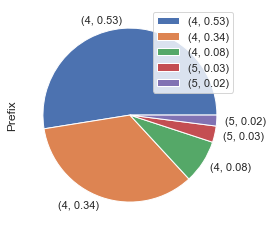

In [33]:
print(grades['Prefix'].value_counts(normalize=True))
grades['Prefix'].value_counts().plot.pie(labels=zip(grades['Prefix'].values, grades['Prefix'].value_counts(normalize=True).round(2))).legend()

In [34]:
# include nan if exists
grades['home.dest'].value_counts(dropna=False)[0:10]

NaN                                          32
Wiltshire, England Niagara Falls, NY          4
New York, NY                                  4
East Providence, RI                           2
Madrid, Spain                                 2
Rotherfield, Sussex, England Essex Co, MA     2
Haverford, PA / Cooperstown, NY               2
Co Longford, Ireland New York, NY             2
Bryn Mawr, PA                                 2
Greece                                        1
Name: home.dest, dtype: int64

In [35]:
# sort
grades['Prefix'].value_counts(ascending=True)

5     2
4     3
6     8
7    34
8    52
Name: Prefix, dtype: int64

In [36]:
# bins
grades['age'].value_counts(bins=10)

(17.65, 18.5]                 38
(16.8, 17.65]                 20
(15.95, 16.8]                 16
(13.4, 14.25]                  6
(12.55, 13.4]                  5
(14.25, 15.1]                  5
(10.85, 11.7]                  4
(11.7, 12.55]                  3
(9.991000000000001, 10.85]     2
(15.1, 15.95]                  0
Name: age, dtype: int64